# Data Analysis and Visualization
## Veer Mangat 10/15/2025
### This notebook analyzes survey data to help guide recruiting and messaging efforts for the CCM IT Department
### Research Questions
#### 1. Why do most people enroll in a class?
#### 2. Do these motivations differ by demographic (age, sex, ethnicity)?
#### 3. Are the majority of students older or younger than 25?
#### 4. Which topic attracts the most interest from non-majors?
#### 5. What major is the most common in the IT Department?
#### I will import 'pandas' to help explore the dataset
#### I will import matplotlib to help visualize the dataset
#### Throughout these 5 questions, I used these resources to help me: the Matplotlib section of W3Schools (https://www.w3schools.com/python/matplotlib_intro.asp) - like the PyPlot and Bar tabs of the website, this webpage of matplotlib docs (https://matplotlib.org/3.2.2/gallery/misc/plotfile_demo_sgskip.html), this GeeksForGeeks page (https://www.geeksforgeeks.org/python/visualize-data-from-csv-file-in-python/), and various StackOverflow posts that I have lost, but they were used for errors I came across in my program


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_enrollment_data.csv')
df.head()

,Unnamed: 0,timestamp,what_degree_program_are_you_currently_enrolled_in?,gender,race/ethnicity,age_,what_motivated_you_to_seek_a_computing_class_at_ccm?_[it’s_a_required_class_for_the_degree_i’m_seeking],what_motivated_you_to_seek_a_computing_class_at_ccm?_[to_keep_current_in_computing_skills],what_motivated_you_to_seek_a_computing_class_at_ccm?_[career_advancement],what_motivated_you_to_seek_a_computing_class_at_ccm?_[career_change],...,what_motivated_you_to_seek_a_computing_class_at_ccm?_[personal_enrichment],what_motivated_you_to_seek_a_computing_class_at_ccm?_[curiosity],"if_you_answered_that_you_were_interested_in_taking_more_computing_classes,_which_ones_interest_you_most?_[web_development]","if_you_answered_that_you_were_interested_in_taking_more_computing_classes,_which_ones_interest_you_most?_[cybersecurity]","if_you_answered_that_you_were_interested_in_taking_more_computing_classes,_which_ones_interest_you_most?_[app_development]","if_you_answered_that_you_were_interested_in_taking_more_computing_classes,_which_ones_interest_you_most?_[data_analytics]","if_you_answered_that_you_were_interested_in_taking_more_computing_classes,_which_ones_interest_you_most?_[machine_learning/artificial_intelligence]","if_you_answered_that_you_were_interested_in_taking_more_computing_classes,_which_ones_interest_you_most?_[computer_programming]","if_you_answered_that_you_were_interested_in_taking_more_computing_classes,_which_ones_interest_you_most?_[game_design]","if_you_answered_that_you_were_interested_in_taking_more_computing_classes,_which_ones_interest_you_most?_[hardware_installation_&_repair]"
0,0,2024/09/10 10:47:35 AM AST,Liberal Arts,Prefer not to say,Hispanic or Latino;Black/African American;Whit...,19-20,No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
1,1,2024/09/10 11:00:05 AM AST,child psychology,Woman,Hispanic or Latino,19-20,Yes,Yes,Yes,No,...,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No
2,2,2024/09/10 11:02:51 AM AST,Broadcasting Arts and Technology,Man,Choose not to reply,18 and younger,Yes,Yes,Yes,Yes,...,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes
3,3,2024/09/10 11:05:25 AM AST,analyst,Man,Hispanic or Latino,19-20,No,Yes,No,No,...,No,No,No,No,No,Yes,No,No,Yes,No
4,4,2024/09/10 8:37:36 PM AST,Journalism,Woman,White/Caucasian,19-20,Yes,Yes,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,No


## 1. Why do most people enroll in a class?

/var/folders/4s/4lj40qrx6mvggvpmngqg06hh0000gp/T/ipykernel_57019/3973133403.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


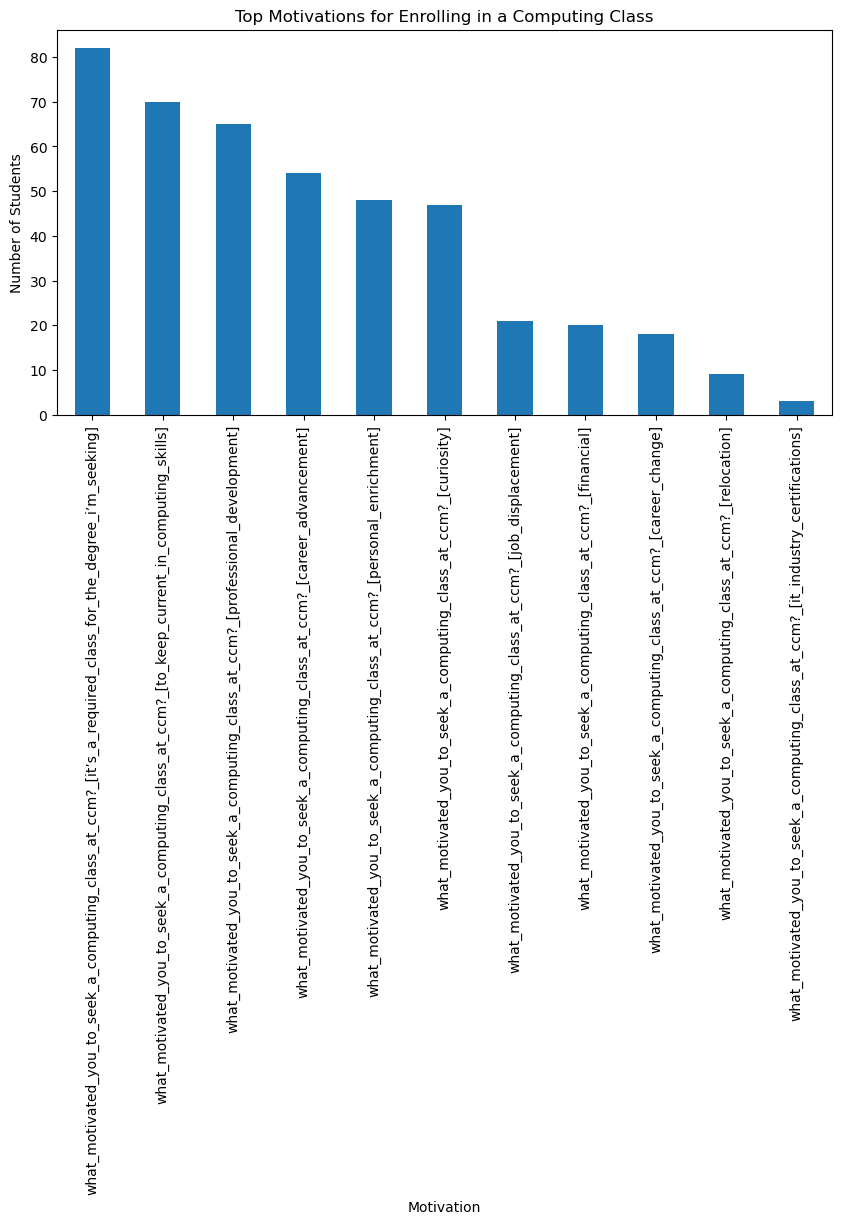

In [8]:
motivation_cols = [c for c in df.columns if 'what_motivated' in c.lower()]
motivation_counts = (df[motivation_cols] == 'Yes').sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
motivation_counts.plot(kind='bar')
plt.title('Top Motivations for Enrolling in a Computing Class')
plt.xlabel('Motivation')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

### The bar chart shows which motivations are most common:
#### 1. required course
#### 2. keep current in skills
#### 3. professional development
#### In future use, I could clean the dataset further to remove the "what motivated you..." words in the column

## 2. Do motivations differ by demographic (Gender)?

/var/folders/4s/4lj40qrx6mvggvpmngqg06hh0000gp/T/ipykernel_57019/909919878.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


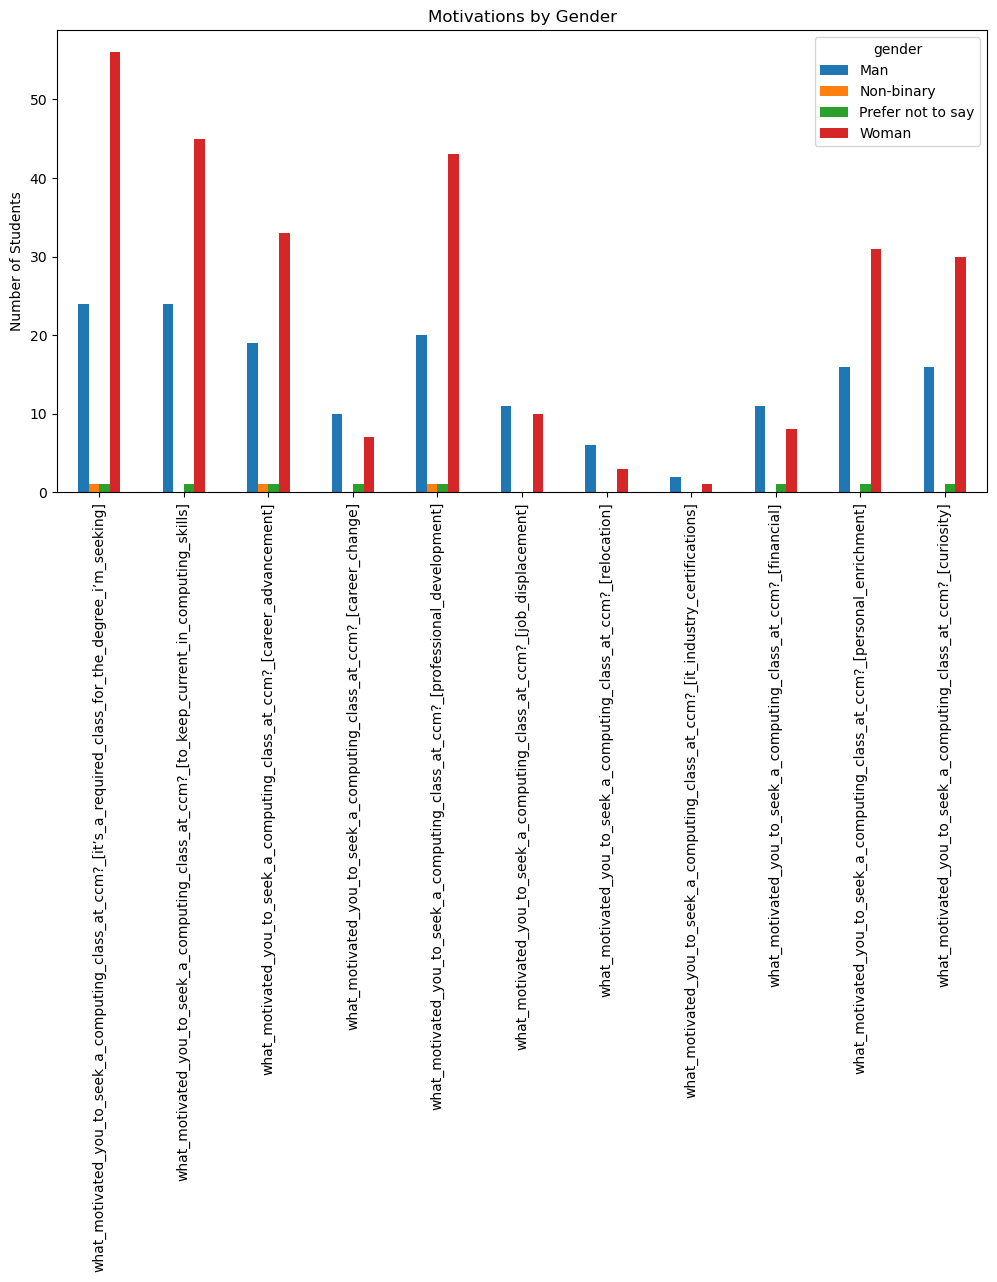

In [3]:
gender_motivation = df.groupby('gender')[motivation_cols].apply(lambda x: (x == 'Yes').sum())

gender_motivation.T.plot(kind='bar', figsize=(12,6))
plt.title('Motivations by Gender')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

### This bar chart shows the difference in motivation by gender:
#### My main takeaway is that women actually answered the form at a higher rate than males, potentially leaving room for faulty data. Since there is not an even split of men and women who answered the form, you can not technically say one gender favored one motivation over another
#### In future use, I could clean the dataset further to remove the "what motivated you..." words in the column

## 3. Are the majority of students older or younger than 25?

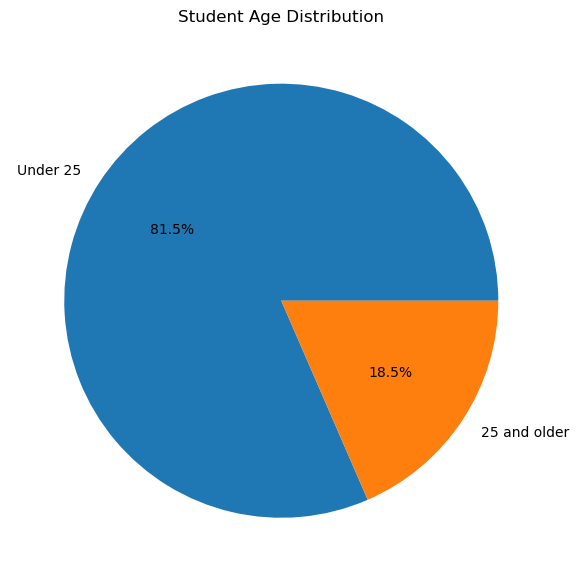

In [4]:
def age_group(age):
    if '18' in age or '19' in age or '20' in age or '21' in age or '22' in age or '23' in age or '24' in age:
        return 'Under 25'
    return '25 and older'

df['age_group'] = df['age_'].astype(str).apply(age_group)
age_counts = df['age_group'].value_counts()

plt.figure(figsize=(6,6))
age_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Student Age Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

### The bar chart shows the age breakdown
#### There is a 1:4 ratio of below 25 (traditional school student) to (nontraditional school student)  


## 4. Which topic attracts the most interest from non-majors?

/var/folders/4s/4lj40qrx6mvggvpmngqg06hh0000gp/T/ipykernel_57019/136458515.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


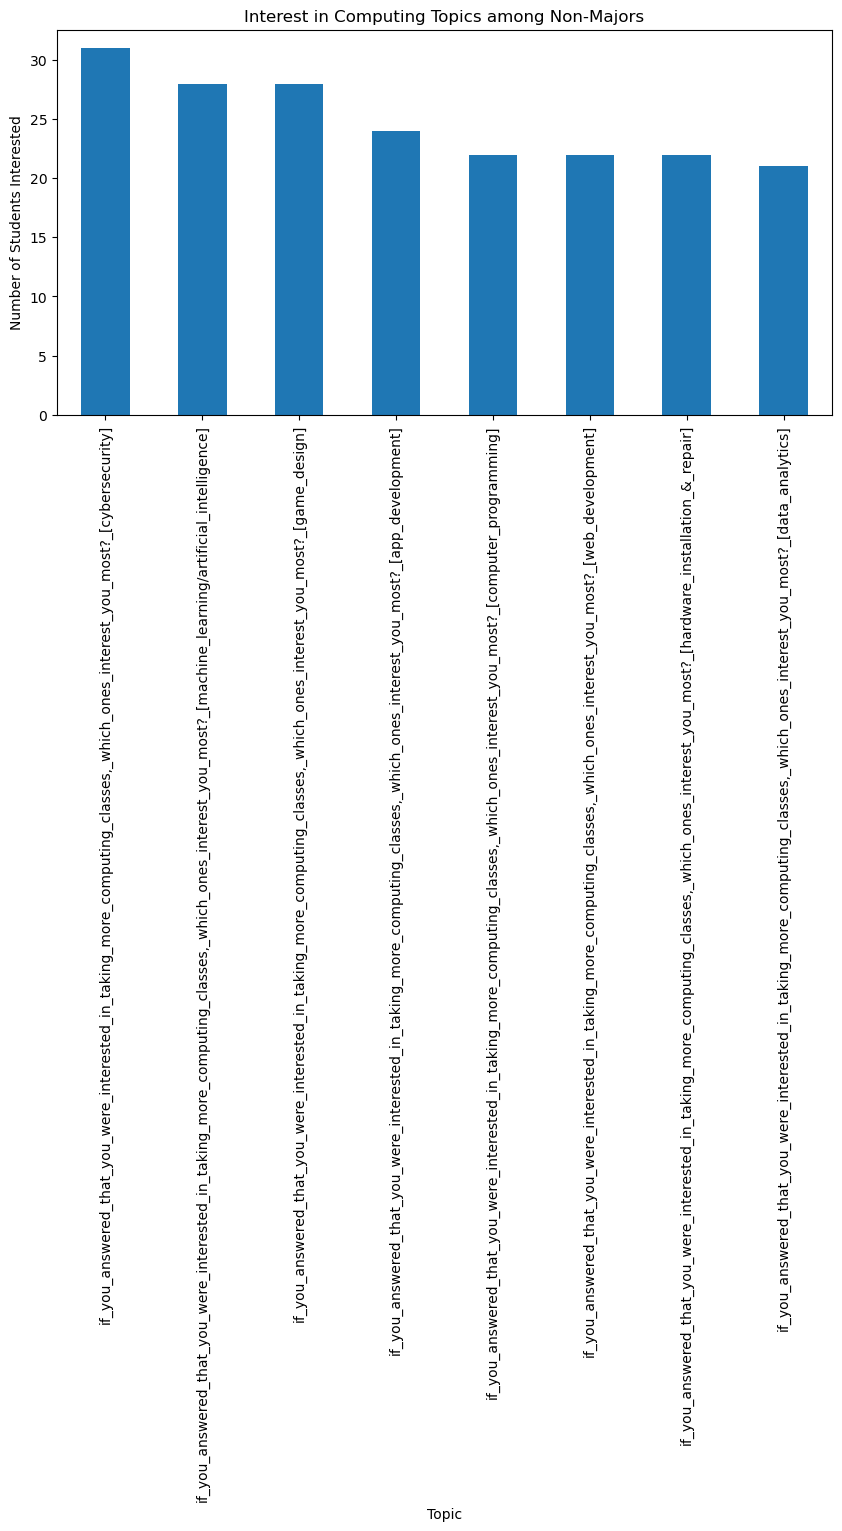

In [5]:
interest_cols = [c for c in df.columns if 'interested_in_taking_more_computing_classes' in c.lower()]
topic_interest = (df[interest_cols] == 'Yes').sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
topic_interest.plot(kind='bar')
plt.title('Interest in Computing Topics among Non-Majors')
plt.xlabel('Topic')
plt.ylabel('Number of Students Interested')
plt.tight_layout()
plt.show()

**Interpretation:** Topics like Cybersecurity or Data Analytics may attract the most attention from non-majors, highlighting potential gateway courses for recruitment.

## 5. What major is most common in the IT Department (excluding CS/IT)?

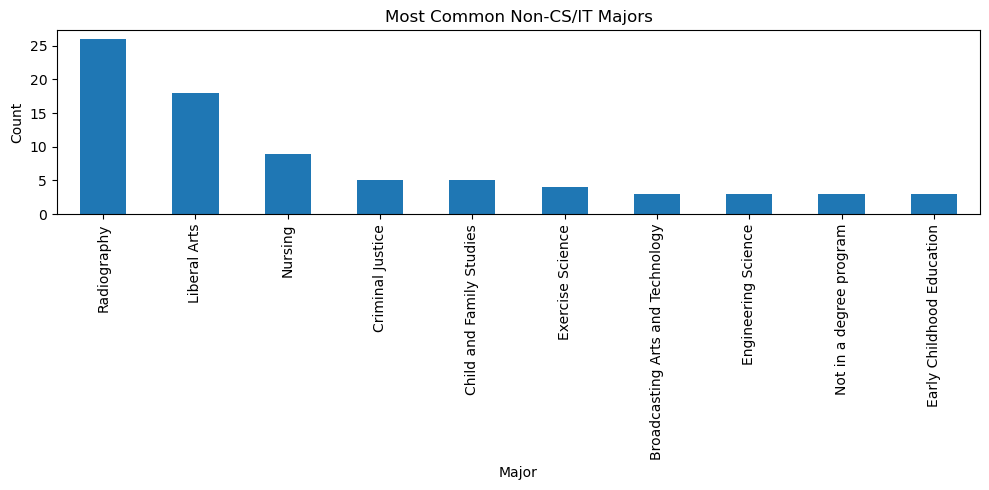

In [6]:
non_it = df[~df['what_degree_program_are_you_currently_enrolled_in?'].str.contains('CS|Computer|IT', case=False, na=False)]
major_counts = non_it['what_degree_program_are_you_currently_enrolled_in?'].value_counts().head(10)

plt.figure(figsize=(10,5))
major_counts.plot(kind='bar')
plt.title('Most Common Non-CS/IT Majors')
plt.xlabel('Major')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### The bar chart shows which majors are most common:
#### 1. Radiography
#### 2. Liberal Arts
#### 3. Nursing
